<a href="https://colab.research.google.com/github/mohdammar128/DeepLearning-/blob/main/Deep_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [11]:
X=np.array([[3,5],[5,1],[10,2]],dtype=float)
X

array([[ 3.,  5.],
       [ 5.,  1.],
       [10.,  2.]])

In [12]:
Y=np.array([[75],[82],[93]],dtype=float)
Y

array([[75.],
       [82.],
       [93.]])

In [13]:
#hours studying | hours_sleeping | score_in test

# **Normalizing Data**


In [14]:
X=X/np.amax(X,axis=0)
Y=Y/100

In [15]:
X,Y

(array([[0.3, 1. ],
        [0.5, 0.2],
        [1. , 0.4]]),
 array([[0.75],
        [0.82],
        [0.93]]))

In [16]:
X.shape,Y.shape

((3, 2), (3, 1))

In [17]:
class NeuralNetwork():
  #Define Hyperparameter
  def __init__(self):
    self.input_size=2
    self.output_size=1
    self.hidden_size=3
 #Define Weight parameter
    self.W=np.random.randn(self.input_size,self.hidden_size)
    self.V=np.random.randn(self.hidden_size,self.output_size)
    #sigmoid funtion
  def sigmoid(self,z):
    z_out=1/(1+np.exp(-z))
    return z_out
  def forward(self,X):
      z1=np.dot(X,self.W) #first Hidden layer z_in
      a1=self.sigmoid(z1) # apply activation function for first hidden layer
      z2=np.dot(a1,self.V)
      y_hat=self.sigmoid(z2)
      return y_hat

In [18]:
nn=NeuralNetwork()
y_hat=nn.forward(X)
y_hat

array([[0.14233515],
       [0.38032638],
       [0.38344263]])

In [19]:
y_hat.flatten()

array([0.14233515, 0.38032638, 0.38344263])

In [20]:
df=pd.DataFrame({'Actual':Y.flatten(),'Predicted':y_hat.flatten()})
df
#

,Actual,Predicted
0,0.75,0.142335
1,0.82,0.380326
2,0.93,0.383443


<Axes: >

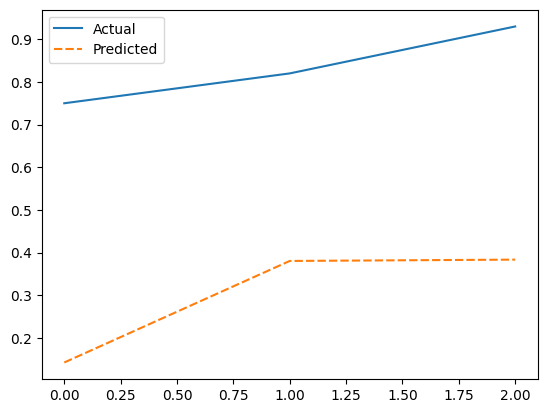

In [21]:
sns.lineplot(data=df)

#

# cost (J) =summation(y-y_hat)^2

In [22]:
import time
start=time.process_time()
cost=np.zeros(1000)
weigts_to_try=np.linspace(-5,5,1000)

for  i in range(1000):
  nn.W[0,0]=weigts_to_try[i]
  y_hat=nn.forward(X)
  cost[i]=np.sum(np.square(Y-y_hat))

end=time.process_time()
print(end-start,np.min(cost))


0.03758429600000035 0.746567662461486


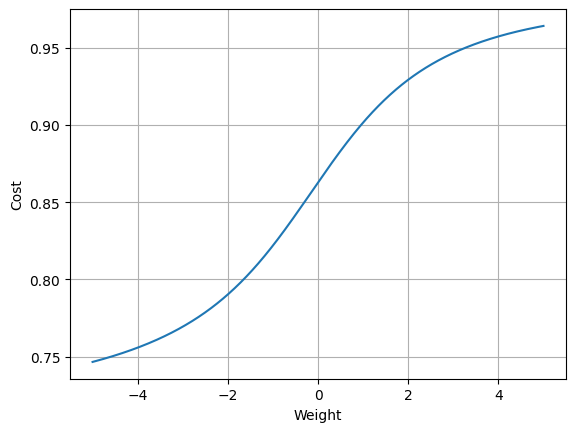

In [23]:
plt.plot(weigts_to_try,cost)
plt.grid(True)
plt.xlabel('Weight')
plt.ylabel('Cost')
plt.show()